In [1]:
# 01_model_overview.ipynb
# Part 1: Model Rankings and Trade-off Analysis

# Imports and Setup
from utils import *

setup_plotting_style()
print_section_header("PART 1: MODEL OVERVIEW & RANKINGS")

# Load Data
df_models, df_class_stats, df_confusion = load_all_data()

print(f"Models: {len(df_models)}")
print(f"Classes: {df_class_stats['Class'].nunique()}")


PART 1: MODEL OVERVIEW & RANKINGS
Models: 12
Classes: 38


In [2]:
# Calculate Efficiency Score
df_models['Efficiency_Score'] = calculate_efficiency_score(df_models)

print_subsection_header("1. MODEL RANKINGS")


--------------------------------------------------------------------------------
1. MODEL RANKINGS
--------------------------------------------------------------------------------


In [3]:
# Top 5 by Accuracy
print("\nTOP 5 BY ACCURACY:")
top_accuracy = df_models.nlargest(5, 'Final_Accuracy')[
    ['Model', 'Final_Accuracy', 'Error_Rate']
]
print(top_accuracy.to_string(index=False))


TOP 5 BY ACCURACY:
       Model  Final_Accuracy  Error_Rate
 InceptionV3       99.594881    0.405119
 DenseNet121       99.585674    0.414326
ShuffleNetV2       99.539637    0.460363
   SimpleCNN       99.484394    0.515606
    ResNet50       99.447565    0.552435


In [4]:
#Top 5 by Efficiency
print("\nTOP 5 BY EFFICIENCY:")
top_efficiency = df_models.nsmallest(5, 'Errors_Per_Minute')[
    ['Model', 'Errors_Per_Minute', 'Final_Accuracy']
]
print(top_efficiency.to_string(index=False))


TOP 5 BY EFFICIENCY:
         Model  Errors_Per_Minute  Final_Accuracy
   DenseNet121           0.295303       99.585674
      ResNet50           0.454558       99.447565
EfficientNetB0           0.616057       99.383114
   InceptionV3           0.655143       99.594881
  ShuffleNetV2           0.822148       99.539637


In [5]:
#  Top 5 by Speed
print("\nTOP 5 BY SPEED:")
top_speed = df_models.nsmallest(5, 'Training_Time_Minutes')[
    ['Model', 'Training_Time_Minutes', 'Final_Accuracy']
]
print(top_speed.to_string(index=False))


TOP 5 BY SPEED:
           Model  Training_Time_Minutes  Final_Accuracy
           LeNet              57.512633       97.247031
         AlexNet              57.631364       95.497652
        ResNet18              59.236315       99.410736
       SimpleCNN              59.792955       99.484394
MobileNetV3Small              60.292190       99.364699


In [6]:
# Top 5 by Model Size
print("\nTOP 5 BY MODEL SIZE:")
top_size = df_models.nsmallest(5, 'Parameters_Million')[
    ['Model', 'Parameters_Million', 'Final_Accuracy']
]
print(top_size.to_string(index=False))



TOP 5 BY MODEL SIZE:
           Model  Parameters_Million  Final_Accuracy
     InceptionV3            1.158662       99.594881
    ShuffleNetV2            1.292554       99.539637
MobileNetV3Small            1.551188       99.364699
       SimpleCNN            1.739686       99.484394
     MobileNetV2            2.899238       99.134518


In [7]:
# Efficiency Score Ranking
print_subsection_header("2. EFFICIENCY SCORE RANKING")

efficiency_rank = df_models[[
    'Model', 'Final_Accuracy', 'Training_Time_Minutes', 
    'Error_Rate', 'Parameters_Million', 'Efficiency_Score'
]].sort_values('Efficiency_Score', ascending=False)

print(efficiency_rank.to_string(index=False))


--------------------------------------------------------------------------------
2. EFFICIENCY SCORE RANKING
--------------------------------------------------------------------------------
           Model  Final_Accuracy  Training_Time_Minutes  Error_Rate  Parameters_Million  Efficiency_Score
     InceptionV3       99.594881              67.160929    0.405119            1.158662       3159.226017
    ShuffleNetV2       99.539637              60.816290    0.460363            1.292554       2750.598747
       SimpleCNN       99.484394              59.792955    0.515606            1.739686       1854.880176
MobileNetV3Small       99.364699              60.292190    0.635301            1.551188       1672.350689
     MobileNetV2       99.134518              74.256110    0.865482            2.899238        532.047974
  EfficientNetB0       99.383114             108.756114    0.616886            4.682914        316.328081
        ResNet18       99.410736              59.236315    0.589264


--------------------------------------------------------------------------------
3. CREATING VISUALIZATIONS
--------------------------------------------------------------------------------
Saved figure: F:\up_git\off_plant_di_err_analyze_daok\analyze_and_results\photos\step1_overview_analysis.png


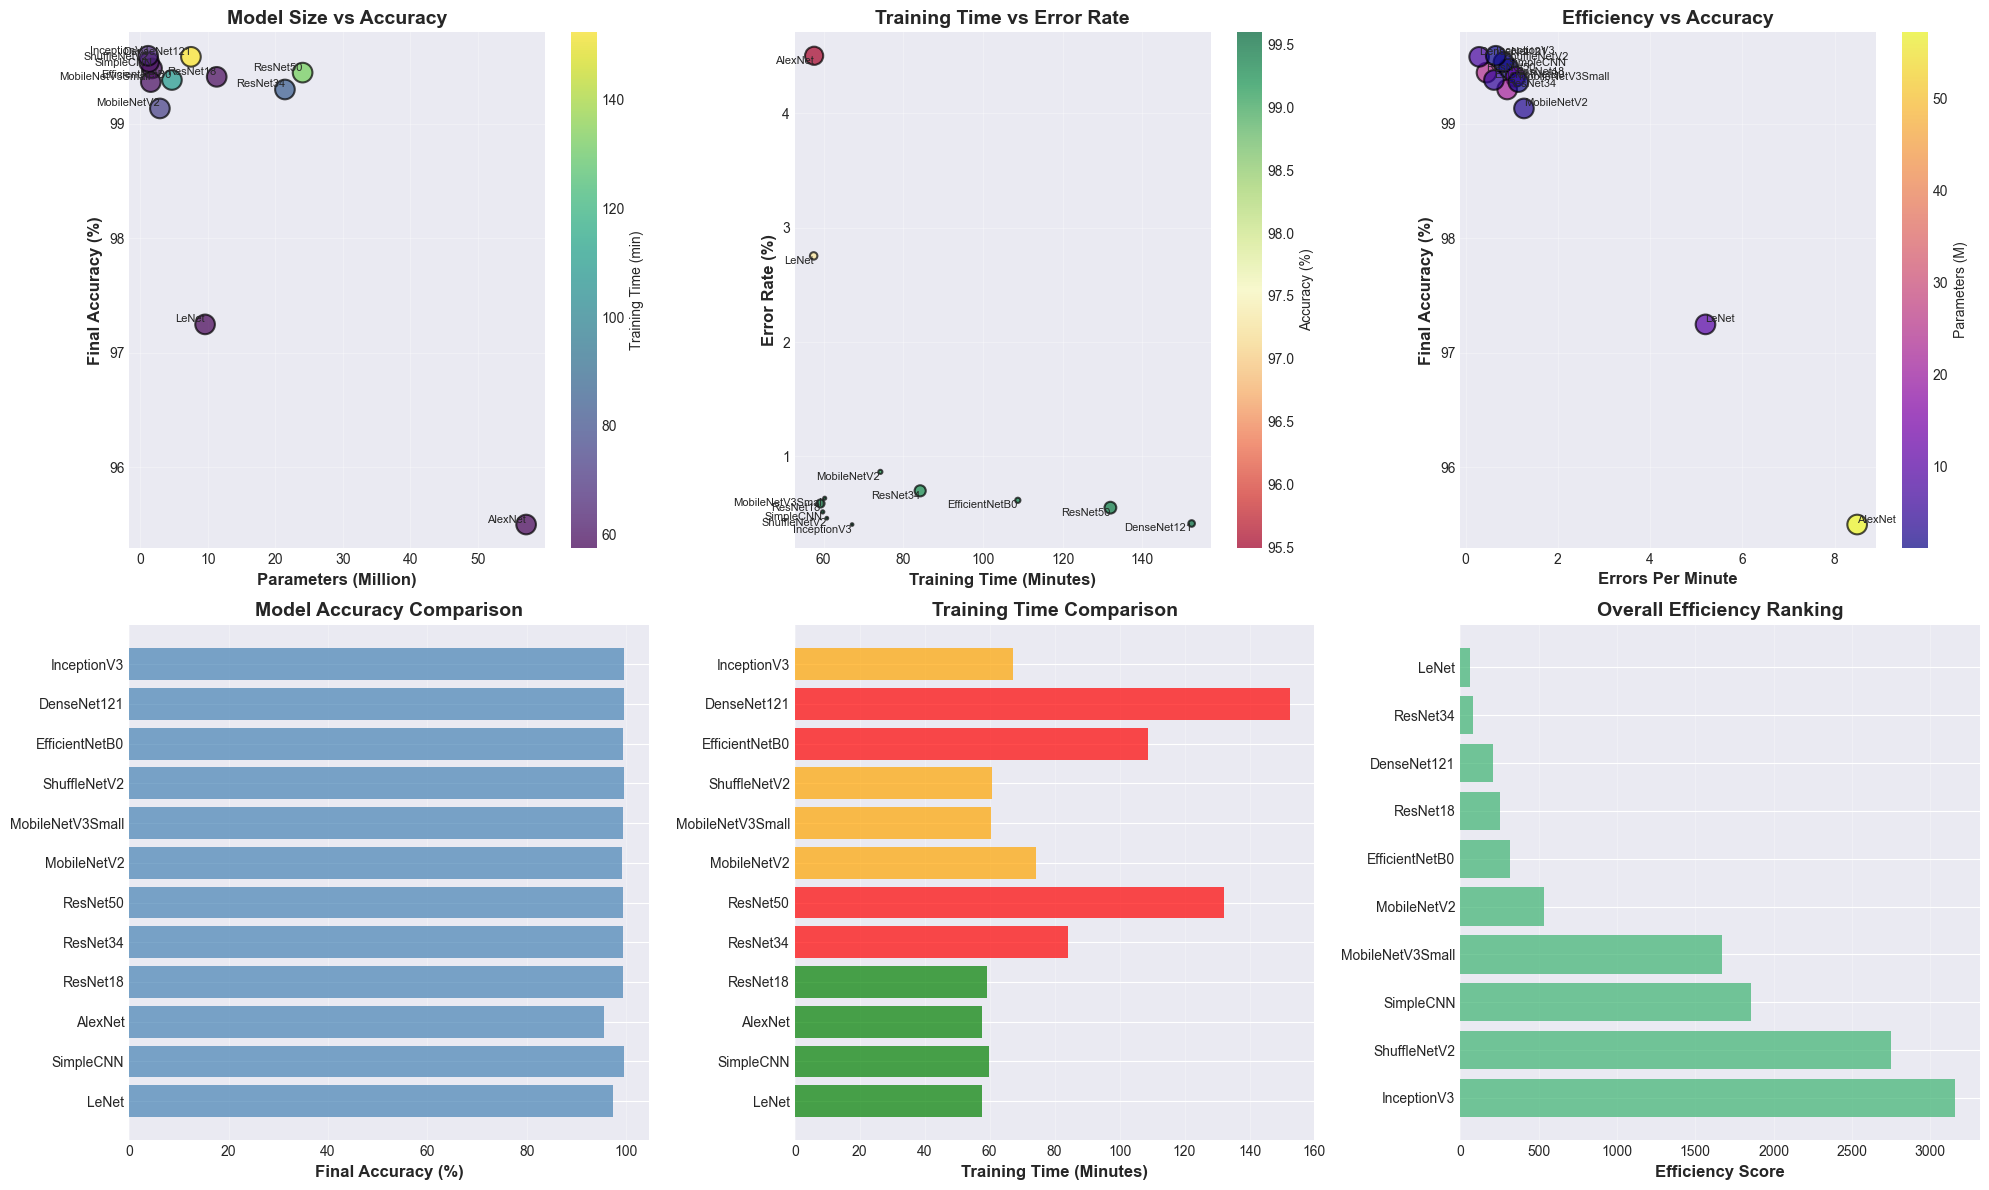

In [8]:
#  Create Visualizations
print_subsection_header("3. CREATING VISUALIZATIONS")

fig = plt.figure(figsize=(20, 12))

# Plot 1: Parameters vs Accuracy
ax1 = plt.subplot(2, 3, 1)
scatter1 = ax1.scatter(df_models['Parameters_Million'], df_models['Final_Accuracy'], 
                       s=200, c=df_models['Training_Time_Minutes'], cmap='viridis', 
                       alpha=0.7, edgecolors='black', linewidth=1.5)
for i, model in enumerate(df_models['Model']):
    ax1.annotate(model, (df_models['Parameters_Million'].iloc[i], 
                         df_models['Final_Accuracy'].iloc[i]),
                fontsize=8, ha='right', va='bottom')
ax1.set_xlabel('Parameters (Million)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Final Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Model Size vs Accuracy', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Training Time (min)')

# Plot 2: Training Time vs Error Rate
ax2 = plt.subplot(2, 3, 2)
scatter2 = ax2.scatter(df_models['Training_Time_Minutes'], df_models['Error_Rate'], 
                       s=df_models['Parameters_Million']*3, c=df_models['Final_Accuracy'], 
                       cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=1.5)
for i, model in enumerate(df_models['Model']):
    ax2.annotate(model, (df_models['Training_Time_Minutes'].iloc[i], 
                         df_models['Error_Rate'].iloc[i]),
                fontsize=8, ha='right', va='top')
ax2.set_xlabel('Training Time (Minutes)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Error Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Training Time vs Error Rate', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Accuracy (%)')

# Plot 3: Errors Per Minute vs Accuracy
ax3 = plt.subplot(2, 3, 3)
scatter3 = ax3.scatter(df_models['Errors_Per_Minute'], df_models['Final_Accuracy'], 
                       s=200, c=df_models['Parameters_Million'], cmap='plasma', 
                       alpha=0.7, edgecolors='black', linewidth=1.5)
for i, model in enumerate(df_models['Model']):
    ax3.annotate(model, (df_models['Errors_Per_Minute'].iloc[i], 
                         df_models['Final_Accuracy'].iloc[i]),
                fontsize=8, ha='left', va='bottom')
ax3.set_xlabel('Errors Per Minute', fontsize=12, fontweight='bold')
ax3.set_ylabel('Final Accuracy (%)', fontsize=12, fontweight='bold')
ax3.set_title('Efficiency vs Accuracy', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=ax3, label='Parameters (M)')

# Plot 4: Accuracy Distribution
ax4 = plt.subplot(2, 3, 4)
ax4.barh(df_models['Model'], df_models['Final_Accuracy'], color='steelblue', alpha=0.7)
ax4.set_xlabel('Final Accuracy (%)', fontsize=12, fontweight='bold')
ax4.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Plot 5: Training Time Comparison
ax5 = plt.subplot(2, 3, 5)
colors = ['green' if x < 60 else 'orange' if x < 80 else 'red' 
          for x in df_models['Training_Time_Minutes']]
ax5.barh(df_models['Model'], df_models['Training_Time_Minutes'], color=colors, alpha=0.7)
ax5.set_xlabel('Training Time (Minutes)', fontsize=12, fontweight='bold')
ax5.set_title('Training Time Comparison', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='x')

# Plot 6: Efficiency Score
ax6 = plt.subplot(2, 3, 6)
top_models = df_models.nlargest(10, 'Efficiency_Score')
ax6.barh(top_models['Model'], top_models['Efficiency_Score'], 
         color='mediumseagreen', alpha=0.7)
ax6.set_xlabel('Efficiency Score', fontsize=12, fontweight='bold')
ax6.set_title('Overall Efficiency Ranking', fontsize=14, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='x')

save_figure('step1_overview_analysis.png')
plt.show()

In [9]:
# Correlation Analysis
print_subsection_header("4. CORRELATION ANALYSIS")

corr_cols = ['Final_Accuracy', 'Error_Rate', 'Training_Time_Minutes', 
             'Parameters_Million', 'Errors_Per_Minute']
corr_matrix = calculate_correlations(df_models, corr_cols)

print("\nCorrelation Matrix:")
print(corr_matrix)


--------------------------------------------------------------------------------
4. CORRELATION ANALYSIS
--------------------------------------------------------------------------------

Correlation Matrix:
                       Final_Accuracy  Error_Rate  Training_Time_Minutes  \
Final_Accuracy               1.000000   -1.000000               0.341809   
Error_Rate                  -1.000000    1.000000              -0.341809   
Training_Time_Minutes        0.341809   -0.341809               1.000000   
Parameters_Million          -0.779069    0.779069              -0.000383   
Errors_Per_Minute           -0.996141    0.996141              -0.410916   

                       Parameters_Million  Errors_Per_Minute  
Final_Accuracy                  -0.779069          -0.996141  
Error_Rate                       0.779069           0.996141  
Training_Time_Minutes           -0.000383          -0.410916  
Parameters_Million               1.000000           0.748612  
Errors_Per_Minute   

Saved figure: F:\up_git\off_plant_di_err_analyze_daok\analyze_and_results\photos\step1_correlation_matrix.png


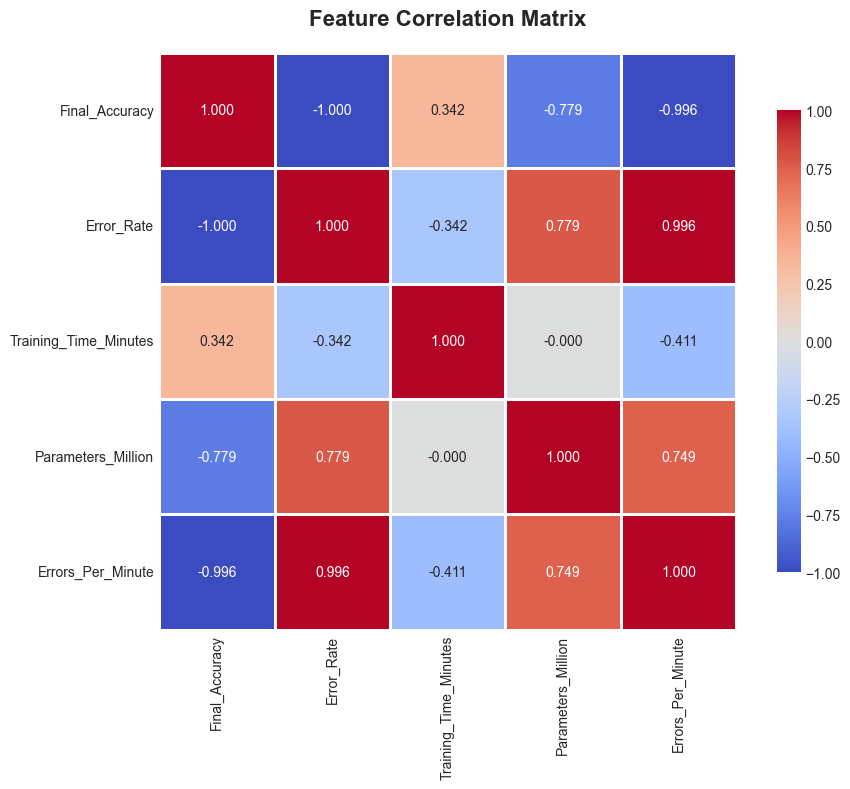

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
save_figure('step1_correlation_matrix.png')
plt.show()


In [11]:



# Key Insights Summary
print_section_header("PART 1 COMPLETE!")

print("\nKey Insights:")
best_acc = df_models.loc[df_models['Final_Accuracy'].idxmax()]
most_eff = df_models.loc[df_models['Efficiency_Score'].idxmax()]
fastest = df_models.loc[df_models['Training_Time_Minutes'].idxmin()]
smallest = df_models.loc[df_models['Parameters_Million'].idxmin()]

print(f"  - Best Accuracy: {best_acc['Model']} ({best_acc['Final_Accuracy']:.2f}%)")
print(f"  - Most Efficient: {most_eff['Model']}")
print(f"  - Fastest Training: {fastest['Model']} ({fastest['Training_Time_Minutes']:.2f} min)")
print(f"  - Smallest Model: {smallest['Model']} ({smallest['Parameters_Million']:.2f}M params)")


PART 1 COMPLETE!

Key Insights:
  - Best Accuracy: InceptionV3 (99.59%)
  - Most Efficient: InceptionV3
  - Fastest Training: LeNet (57.51 min)
  - Smallest Model: InceptionV3 (1.16M params)
